# Financial Metrics

metrics used in stock analysis

In [20]:
import pandas as pd
import numpy as np
import os

df = pd.read_hdf(os.path.join('..', 'data', 'HK.00700'))
df.index = df['date']
# df = df.drop(columns=['date', 'code'])
df = df[['open', 'high', 'low', 'close']]
df.tail()

,open,high,low,close
date,,,,
2021-04-14,621.0,625.0,615.5,623.5
2021-04-15,623.5,623.5,610.5,620.0
2021-04-16,620.0,632.5,616.0,632.0
2021-04-19,630.0,644.0,620.0,627.0
2021-04-20,620.0,626.0,618.0,622.5


# Summary Statistics

In [21]:
df.aggregate([min,
              np.mean,  
              np.std,  
              np.median,  
              max]).round(2)

,open,high,low,close
min,21.78,22.42,21.78,22.20
mean,209.42,211.81,206.72,209.18
std,170.67,172.85,168.24,170.32
median,149.14,151.34,147.54,149.04
max,767.00,775.50,751.50,766.50


# Changes Over Time

In [22]:
df.diff().tail()

,open,high,low,close
date,,,,
2021-04-14,7.5,3.0,8.5,15.5
2021-04-15,2.5,-1.5,-5.0,-3.5
2021-04-16,-3.5,9.0,5.5,12.0
2021-04-19,10.0,11.5,4.0,-5.0
2021-04-20,-10.0,-18.0,-2.0,-4.5


In [23]:
df.pct_change().round(5).tail() 

,open,high,low,close
date,,,,
2021-04-14,0.01222,0.00482,0.01400,0.02549
2021-04-15,0.00403,-0.00240,-0.00812,-0.00561
2021-04-16,-0.00561,0.01443,0.00901,0.01935
2021-04-19,0.01613,0.01818,0.00649,-0.00791
2021-04-20,-0.01587,-0.02795,-0.00323,-0.00718


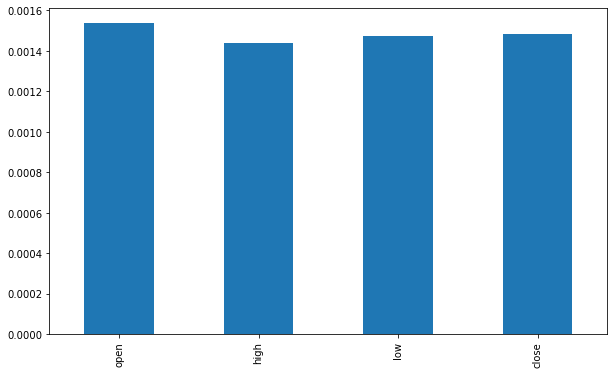

In [24]:
df.pct_change().mean().plot(kind='bar', figsize=(10, 6))

# the logarithmic return 

In [26]:
rets = np.log(df / df.shift(1)) 
rets.tail().round(5)

,open,high,low,close
date,,,,
2021-04-14,0.01215,0.00481,0.01391,0.02517
2021-04-15,0.00402,-0.00240,-0.00816,-0.00563
2021-04-16,-0.00563,0.01433,0.00897,0.01917
2021-04-19,0.01600,0.01802,0.00647,-0.00794
2021-04-20,-0.01600,-0.02835,-0.00323,-0.00720


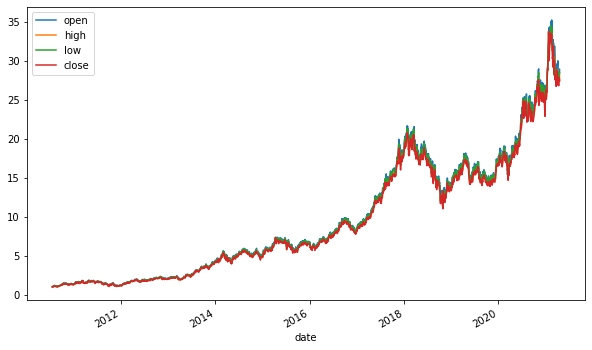

In [27]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6))

# resampling

In [31]:
df.resample('1w', label='right').last().tail()

,open,high,low,close
date,,,,
2021-03-28,606.0,632.0,605.5,620.0
2021-04-04,627.5,656.0,621.5,654.0
2021-04-11,629.0,629.0,615.5,620.5
2021-04-18,620.0,632.5,616.0,632.0
2021-04-25,620.0,626.0,618.0,622.5


In [32]:
df.resample('1m', label='right').last().tail()  

,open,high,low,close
date,,,,
2020-12-31,565.0,569.0,559.5,564.0
2021-01-31,695.0,717.0,681.5,681.5
2021-02-28,669.0,686.5,662.5,662.5
2021-03-31,618.0,621.5,609.0,610.0
2021-04-30,620.0,626.0,618.0,622.5


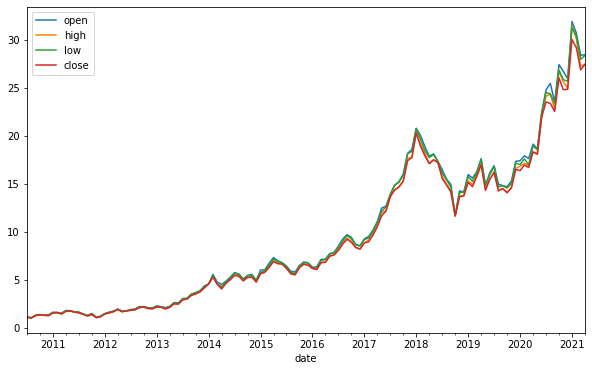

In [33]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last(
                          ).plot(figsize=(10, 6));

# Rolling Statistics

In [34]:
window = 20  
df['min'] = df['close'].rolling(window=window).min()
df['mean'] = df['close'].rolling(window=window).mean()
df['std'] = df['close'].rolling(window=window).std()
df['median'] = df['close'].rolling(window=window).median()
df['max'] = df['close'].rolling(window=window).max()
df['ewma'] = df['close'].ewm(halflife=0.5, min_periods=window).mean()
df.tail()

,open,high,low,close,min,mean,std,median,max,ewma
date,,,,,,,,,,
2021-04-14,621.0,625.0,615.5,623.5,606.0,623.175,11.830241,623.5,654.0,620.088752
2021-04-15,623.5,623.5,610.5,620.0,606.0,622.775,11.793704,622.0,654.0,620.022188
2021-04-16,620.0,632.5,616.0,632.0,606.0,622.850,11.850050,622.0,654.0,629.005547
2021-04-19,630.0,644.0,620.0,627.0,606.0,622.975,11.881515,622.0,654.0,627.501387
2021-04-20,620.0,626.0,618.0,622.5,606.0,622.075,11.142941,621.5,654.0,623.750347


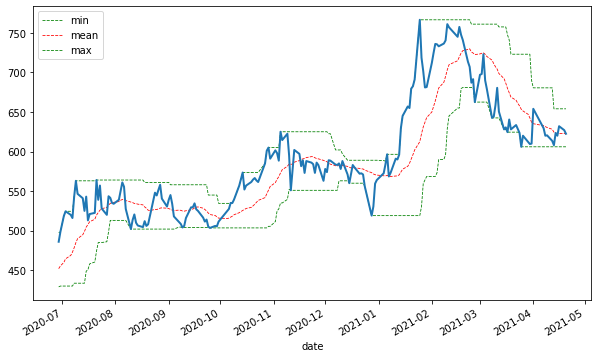

In [35]:
ax = df[['min', 'mean', 'max']].iloc[-200:].plot(
    figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)  
df['close'].iloc[-200:].plot(ax=ax, lw=2.0)

# Example for Technical Analysis

In [37]:
df['SMA1'] = df['close'].rolling(window=42).mean()  
df['SMA2'] = df['close'].rolling(window=252).mean()  
df[['close', 'SMA1', 'SMA2']].tail()

,close,SMA1,SMA2
date,,,
2021-04-14,623.5,665.178571,552.398810
2021-04-15,620.0,662.309524,553.370238
2021-04-16,632.0,659.238095,554.369444
2021-04-19,627.0,656.142857,555.324206
2021-04-20,622.5,653.226190,556.271429


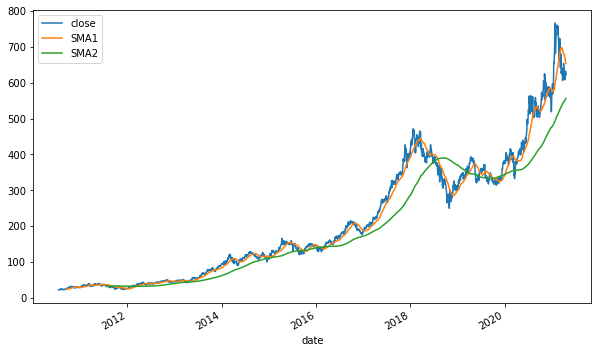

In [38]:
df[['close', 'SMA1', 'SMA2']].plot(figsize=(10, 6));  

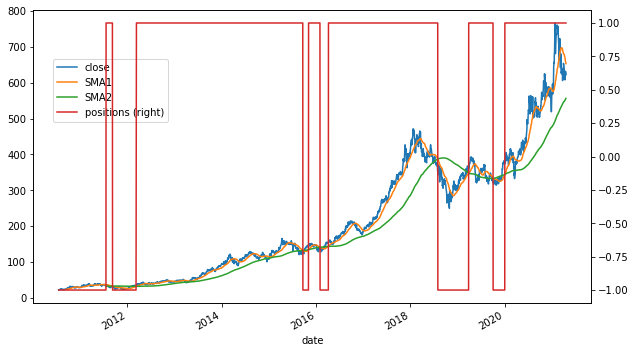

In [39]:
df['positions'] = np.where(df['SMA1'] > df['SMA2'], 1, -1)
ax = df[['close', 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),
                                              secondary_y='positions')  # sencond Y axis
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

# Logarithmic rate of return

In [40]:
rets = np.log(df['close'] / df['close'].shift(1))
rets.tail()

date
2021-04-14    0.025174
2021-04-15   -0.005629
2021-04-16    0.019170
2021-04-19   -0.007943
2021-04-20   -0.007203
Name: close, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f039faf08b0>],
      dtype=object)

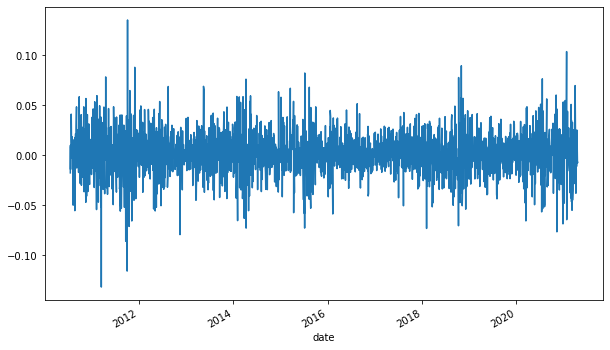

In [41]:
rets.plot(subplots=True, figsize=(10, 6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f039f94cac0>],
      dtype=object)

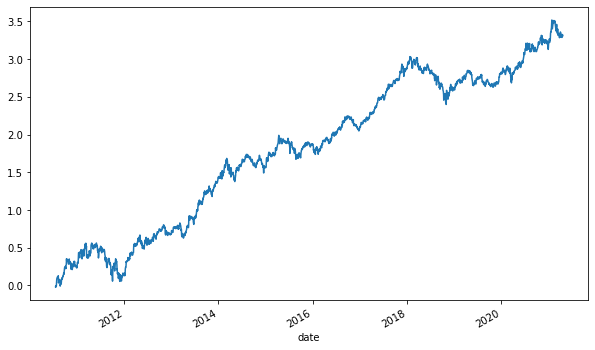

In [45]:
rets.cumsum().plot(subplots=True, figsize=(10, 6))  # cumulative sum of log return